In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-07-29 21:07:17.736592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753823238.114045      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753823238.218366      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
train_dir = '/kaggle/input/labeled-chest-xray-images/chest_xray/train'
test_dir = '/kaggle/input/labeled-chest-xray-images/chest_xray/test'

In [19]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5232 images belonging to 2 classes.


In [23]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753823520.882289      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753823520.882980      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1753823537.057539     123 service.cc:148] XLA service 0x7f750c005ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753823537.059442     123 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753823537.059462     123 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753823537.508774     123 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/164 ━━━━━━━━━━━━━━━━━━━━ 20:47 8s/step - accuracy: 0.3438 - loss: 0.7003

I0000 00:00:1753823541.786038     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


164/164 ━━━━━━━━━━━━━━━━━━━━ 130s 751ms/step - accuracy: 0.7897 - loss: 0.4679 - val_accuracy: 0.7917 - val_loss: 0.4195
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 438ms/step - accuracy: 0.9059 - loss: 0.2376 - val_accuracy: 0.7885 - val_loss: 0.5205
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 73s 443ms/step - accuracy: 0.9254 - loss: 0.1958 - val_accuracy: 0.8830 - val_loss: 0.2296
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 437ms/step - accuracy: 0.9191 - loss: 0.1979 - val_accuracy: 0.8397 - val_loss: 0.3766
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 71s 435ms/step - accuracy: 0.9326 - loss: 0.1642 - val_accuracy: 0.9311 - val_loss: 0.1750
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 437ms/step - accuracy: 0.9395 - loss: 0.1502 - val_accuracy: 0.9087 - val_loss: 0.2004
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 439ms/step - accuracy: 0.9380 - loss: 0.1569 - val_accuracy: 0.9391 - val_loss: 0.1654
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 436ms/step - accuracy: 0.9471 - loss: 0.1515 - va

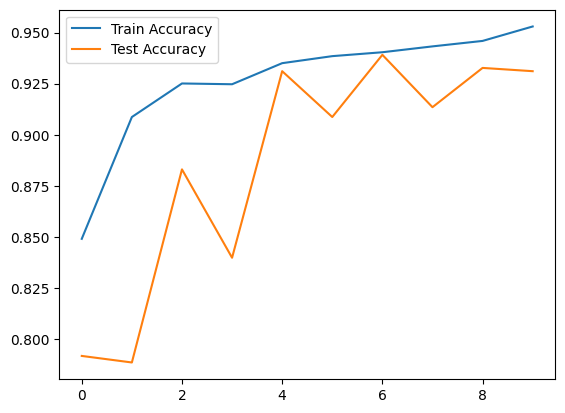

In [27]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()